# Q&A Activity Question Week -10

In [1]:
#Importing libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

### 1.READING DATASET TO PYTHON  ENVIRONMENT

In [3]:
data=pd.read_csv('employee.csv')

In [4]:
data.head()

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [5]:
#Checking the shape of the dataset

In [6]:
data.shape

(9, 7)

In [7]:
#Checking the summery of the dataset using info() 

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [9]:
#Checking the sum of null values present in our dataset usimg isna().sum()

In [10]:
data.isna().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [11]:
#Getting ststistical values for our dataset using describe()

In [12]:
data.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


### 2.Reset the index as "name" as the index.

In [13]:
data.set_index(['name'],inplace=True)

In [14]:
data.head()

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


### 3.Select rows for specific names Jack Morgan and Josh wills.

In [15]:
#Checking the shape of the dataset
df=pd.DataFrame(data)
df.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


### 4. Select data for multiple values "Sales" and “Finance”.

In [16]:
df.loc[(data['department']=='Sales') | (data['department']=='Finance')]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 5. Display employee who has more than 700 performance score.

In [17]:
df.loc[(data['performance_score']) > 700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 6. Display employee who has more than 500 and less than 700 performance score

In [18]:
df.loc[(data['performance_score']<700) & (data['performance_score']>500) ]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


### 7. Check and handle missing values in the dataset.

In [19]:
#Checking the data types of the values

In [20]:
data.dtypes

age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

In [21]:
#We can plot hystogram using the dataset

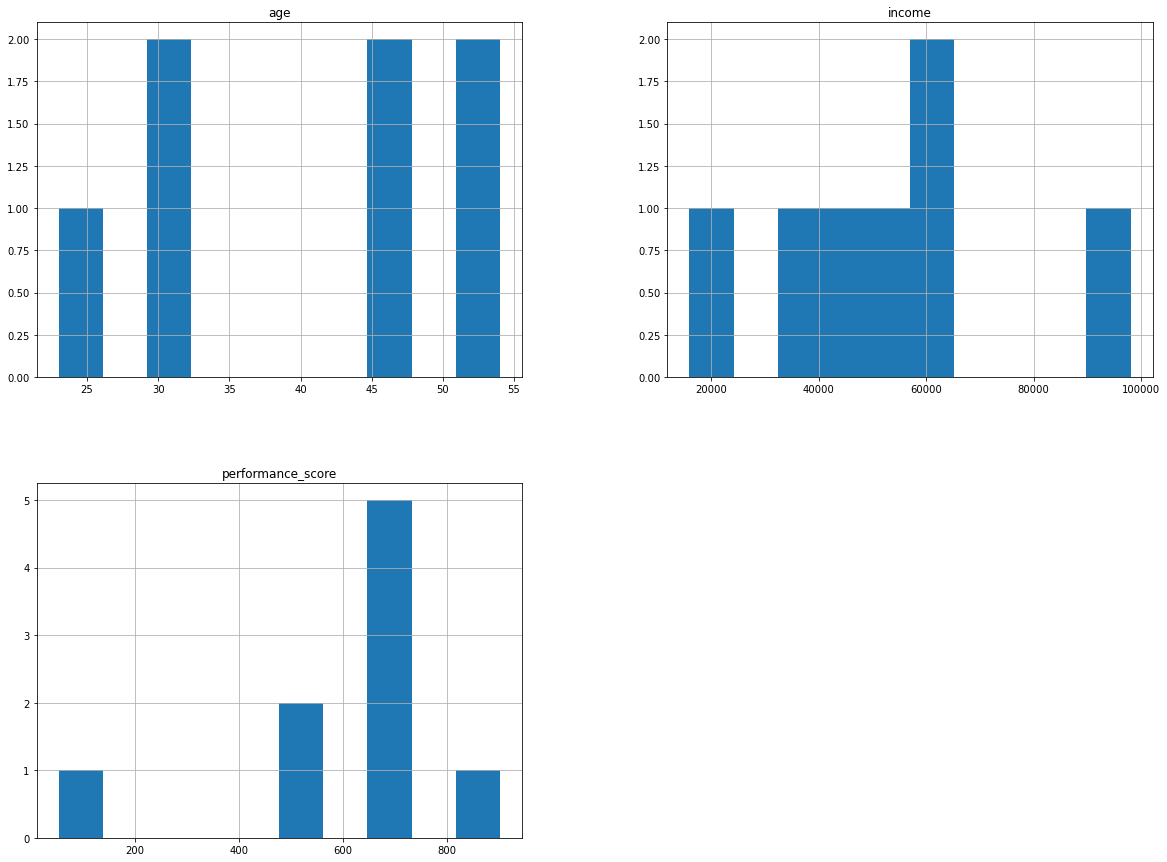

In [22]:
#Selecting variables to plot
hist_graph=data.select_dtypes(include=['int64','float'])
#Plotting histogram
hist_graph.hist(figsize=(20,15))
plt.show()

We can see from the graphs above that some bins show a huge gap between them, which indicates that some values are missing between those bins.

In [23]:
#We can check the null values using isnull() or isna() and we can use sum() for getting the sum of null values

In [24]:
data.isnull().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

We can see that each age, income and gender colmns contains 2 null values 

In [25]:
#Plotting distplot to check if the data is skewed

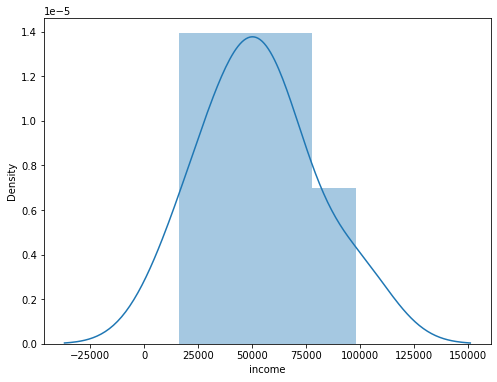

In [26]:
fig,ax=plt.subplots(figsize=(8,6))
sns.distplot(data.income)
plt.show()

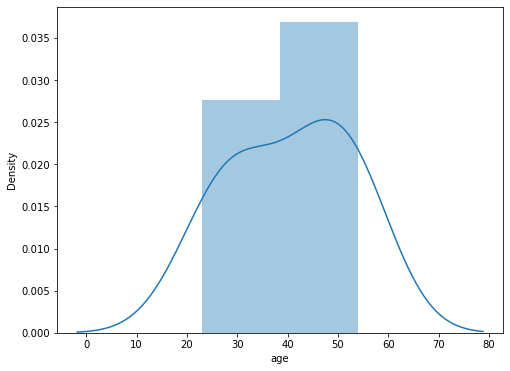

In [27]:
fig,ax=plt.subplots(figsize=(8,6))
sns.distplot(data.age)
plt.show()

We can decide which method should be applied to fill the nan value by checking the skewness of data if data is skewed it is not recommended to use the mean for replacing the missing values. Using mean values for replacing missing values may not create a great model if the data is skewed in such cases we can use median if the value is numerical.We can check the skewness of data by plotting graphs.

In [28]:
#Handling missing values in age column

In [29]:
data['age']=data['age'].fillna(data['age'].median())

In [30]:
#Handling missing values in income column

In [31]:
data['income']=data['income'].fillna(data['income'].median())

In [32]:
#Handling missing value in gender column
#gender is a categorical value so we use mode() to find frequent values in tht column and replace the nan value with that.

In [33]:
#Assignng the categorical 
categ_val=['gender']
data[categ_val]=data[categ_val].fillna(data.mode().iloc[0])

In [34]:
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,F,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,F,Sales,G3,649
James Authur,54.0,52000.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [35]:
#Checking the null values again

In [36]:
data.isnull().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

So we can see that now there is no null values in our dataset

## 8. Check the outliers and handle outliers in performance score using Percentiles.

In [37]:
#We will plot boxplot to check the outliers

#### AGE

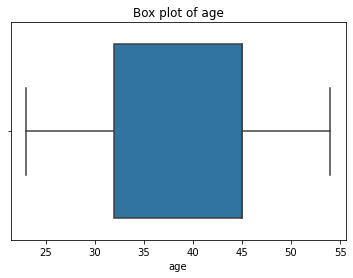

In [38]:
sns.boxplot(data['age'])
plt.title('Box plot of age')
plt.show()

No outliers in age coloumn

#### INCOME

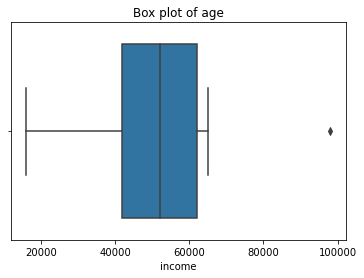

In [39]:
sns.boxplot(data['income'])
plt.title('Box plot of age')
plt.show()

There is an outlier in income column

In [40]:
#Using IQR method for handling the outlier

In [41]:
Q1=np.percentile(data['income'],25,interpolation='midpoint')
Q2=np.percentile(data['income'],50,interpolation='midpoint')
Q3=np.percentile(data['income'],75,interpolation='midpoint')

In [42]:
print(Q1)
print(Q2)
print(Q3)

42000.0
52000.0
62000.0


In [43]:
#data['income'].medion()

In [44]:
IQR=Q3-Q1

In [45]:
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print('low_limit=',low_limit)
print('up_limit=',up_limit)

low_limit= 12000.0
up_limit= 92000.0


In [46]:
outlier = []
for x in data['income']:
    if ((x > up_limit) or (x < low_limit)):
        outlier.append(x)
print(outlier)  


[98000.0]


In [47]:
#Finding the index of the outlier
outl=data['income']>up_limit
data.loc[outl].index

Index(['Leo Duck'], dtype='object', name='name')

In [48]:
data.loc[outl]

,age,income,gender,department,grade,performance_score
name,,,,,,
Leo Duck,23.0,98000.0,M,Sales,G4,709


#### PERFORMANCE SCORE

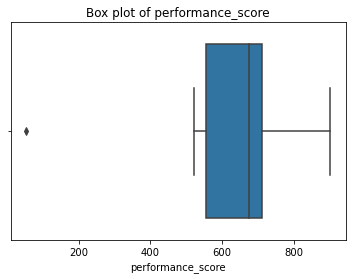

In [49]:
sns.boxplot(data['performance_score'])
plt.title('Box plot of performance_score')
plt.show()

There is an outlier in income column

In [50]:
#Using IQR method for handling the outlier
Q1=np.percentile(data['performance_score'],25,interpolation='midpoint')
Q2=np.percentile(data['performance_score'],50,interpolation='midpoint')
Q3=np.percentile(data['performance_score'],75,interpolation='midpoint')

In [51]:
print(Q1)
print(Q2)
print(Q3)

556.0
674.0
711.0


In [52]:
IQR=Q3-Q1

In [53]:
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print('low_limit=',low_limit)
print('up_limit=',up_limit)

low_limit= 323.5
up_limit= 943.5


In [54]:
outlier = []
for x in data['performance_score']:
    if ((x > up_limit) or (x < low_limit)):
        outlier.append(x)
print(outlier)  

[53]


In [55]:
#Finding the index of the outlier
outl=data['performance_score']<low_limit
data.loc[outl].index

Index(['James Authur'], dtype='object', name='name')

In [56]:
df.loc[outl]

,age,income,gender,department,grade,performance_score
name,,,,,,
James Authur,54.0,52000.0,F,Operations,G3,53


We only have 9 rows in our dataset so we cant drop any outlier otherwise it will affect our model building.

### 9. Check the gender column and do Dummy encoding.

In [57]:
data['gender']

name
Allen Smith      F
S Kumar          F
Jack Morgan      M
Ying Chin        F
Dheeraj Patel    F
Satyam Sharma    F
James Authur     F
Josh Wills       F
Leo Duck         M
Name: gender, dtype: object

In [58]:
dummy_encod=pd.get_dummies(data,columns=['gender'])

In [59]:
dummy_encod

,age,income,department,grade,performance_score,gender_F,gender_M
name,,,,,,,
Allen Smith,45.0,52000.0,Operations,G3,723,1,0
S Kumar,45.0,16000.0,Finance,G0,520,1,0
Jack Morgan,32.0,35000.0,Finance,G2,674,0,1
Ying Chin,45.0,65000.0,Sales,G3,556,1,0
Dheeraj Patel,30.0,42000.0,Operations,G2,711,1,0
Satyam Sharma,45.0,62000.0,Sales,G3,649,1,0
James Authur,54.0,52000.0,Operations,G3,53,1,0
Josh Wills,54.0,52000.0,Finance,G3,901,1,0
Leo Duck,23.0,98000.0,Sales,G4,709,0,1


### 10. Do the standard scaling on the feature performance score.

In [60]:
#Importing library for standard scaling

In [61]:
from sklearn import preprocessing

In [62]:
standardisation=preprocessing.StandardScaler()

In [63]:
#std_scale=standardisation.fit_transform(np.array(dummy_encod.performance_score).reshape(-1,1))

In [64]:
#dummy_encod.performance_score=std_scale

In [65]:
standardisation=preprocessing.StandardScaler()
std_scale=standardisation.fit_transform(dummy_encod[['performance_score']])
dummy_encod['performance_score']=std_scale

In [66]:
dummy_encod

,age,income,department,grade,performance_score,gender_F,gender_M
name,,,,,,,
Allen Smith,45.0,52000.0,Operations,G3,0.505565,1,0
S Kumar,45.0,16000.0,Finance,G0,-0.408053,1,0
Jack Morgan,32.0,35000.0,Finance,G2,0.285037,0,1
Ying Chin,45.0,65000.0,Sales,G3,-0.246032,1,0
Dheeraj Patel,30.0,42000.0,Operations,G2,0.451558,1,0
Satyam Sharma,45.0,62000.0,Sales,G3,0.172522,1,0
James Authur,54.0,52000.0,Operations,G3,-2.509823,1,0
Josh Wills,54.0,52000.0,Finance,G3,1.306668,1,0
Leo Duck,23.0,98000.0,Sales,G4,0.442557,0,1


In [70]:
#Creating regression model
y=dummy_encod['performance_score']
x = dummy_encod.drop(['performance_score','department', 'grade'], axis = 1)

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.2)

In [72]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [73]:
model = lr.fit(x_train, y_train)
predictions= model.predict(x_test)

In [75]:
#Calculating mse
from sklearn.metrics import mean_squared_error
print('MSE =', mean_squared_error(y_test, predictions))

MSE = 3.3796220538097135
